#Installing the Package

In [9]:
!pip install openvino-colab
!pip install openvino

     |████████████████████████████████| 28.2 MB 45 kB/s 


# Importing the Package

In [1]:
import openvino_colab #choose 5 generally, this step generally takes some time

Installed OpenVINO Dependencies. Installing OpenVINO...
ENV Variables Set!
Please enter the Choice of framework you want to work with:

(Note: You should only install for the ones you would be using.
Incase of needing to install for more than one but not all, rerun this cell and 
install the pre-requisites one by one.)

1 tf
2 mxnet
3 onnx
4 kaldi
5 all
Please enter your choice (Default Option - 5): 5
Choice is 5.0 : all


Intel OpenVINO Installation Finished!


# OpenVINO-Colab Project Cloning

In [2]:
!git clone "https://github.com/alihussainia/openvino-colab.git"

Cloning into 'openvino-colab'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 378 (delta 22), reused 0 (delta 0), pack-reused 325
Receiving objects: 100% (378/378), 73.03 MiB | 35.28 MiB/s, done.
Resolving deltas: 100% (153/153), done.


# Declaring Path Variables
Creating short variables to avoid using long paths during the exercise. 

In [3]:
install_dir = "/opt/intel/openvino_2021/"
model_optimizer = '/opt/intel/openvino_2021/deployment_tools/model_optimizer/'
deployment_tools = '/opt/intel/openvino_2021/deployment_tools/'
model_zoo = '/opt/intel/openvino_2021/deployment_tools/open_model_zoo/'

# Downloading Model

In [4]:
cd /content/openvino-colab/demo_files/

/content/openvino-colab/demo_files


##Generate XML and BIN Files

In [5]:
!python $model_zoo'tools/downloader/'downloader.py --name vehicle-attributes-recognition-barrier-0039 --precisions FP32 -o /content/openvino-colab/demo_files/models

################|| Downloading vehicle-attributes-recognition-barrier-0039 ||################

========== Downloading /content/openvino-colab/demo_files/models/intel/vehicle-attributes-recognition-barrier-0039/FP32/vehicle-attributes-recognition-barrier-0039.xml
... 100%, 37 KB, 309 KB/s, 0 seconds passed

========== Downloading /content/openvino-colab/demo_files/models/intel/vehicle-attributes-recognition-barrier-0039/FP32/vehicle-attributes-recognition-barrier-0039.bin
... 100%, 2445 KB, 2908 KB/s, 0 seconds passed



# Running Inference

The setupvars.sh file is present here: https://github.com/jojo96/intel-openvino-colab/blob/main/setupvars.sh

**These 2 steps below need to be carried out:**

- Download it and place it in **/content/openvino-colab/demo_files/**

- open inference.py (inside **/content/openvino-colab/demo_files/**). At the top include the statement:
 **import openvino**



In [13]:
!source /content/openvino-colab/demo_files/setupvars.sh && python app.py -i "images/blue-car.jpg" -t "CAR_META" -m "/content/openvino-colab/demo_files/models/intel/vehicle-attributes-recognition-barrier-0039/FP32/vehicle-attributes-recognition-barrier-0039.xml" 

[setupvars.sh] OpenVINO environment initialized
/content/openvino-colab/demo_files/inference.py:42: DeprecationWarning: Reading network using constructor is deprecated. Please, use IECore.read_network() method instead
  network = IENetwork(model=model_xml, weights=model_bin)
/content/openvino-colab/demo_files/inference.py:48: DeprecationWarning: 'inputs' property of IENetwork class is deprecated. To access DataPtrs user need to use 'input_data' property of InputInfoPtr objects which can be accessed by 'input_info' property.
  self.input_blob = next(iter(network.inputs))
/content/openvino-colab/demo_files/inference.py:66: DeprecationWarning: 'outputs' property of InferRequest is deprecated. Please instead use 'output_blobs' property.
  return self.exec_network.requests[0].outputs
Success


# Output

In [14]:
cd /content/openvino-colab/demo_files/outputs/

/content/openvino-colab/demo_files/outputs


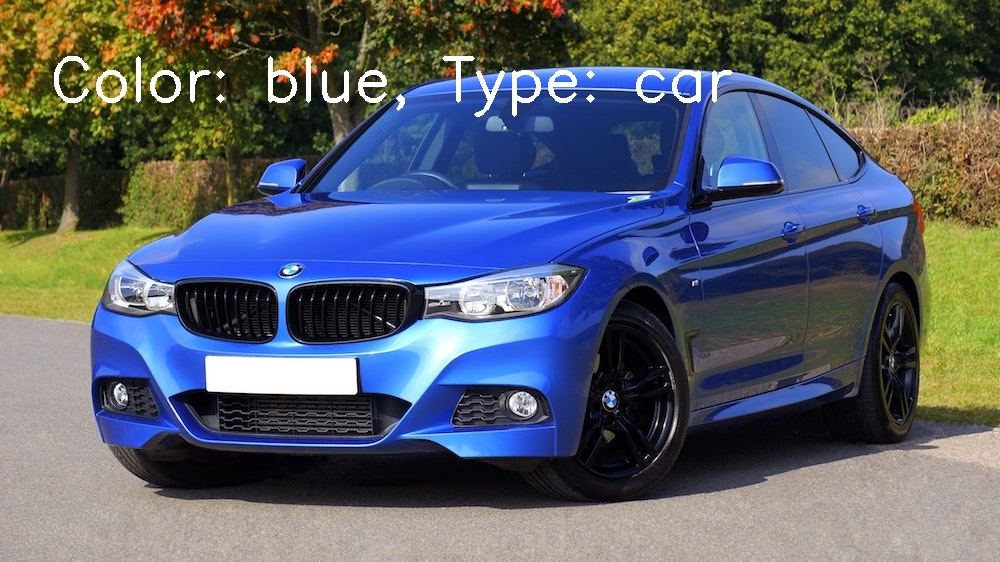

In [15]:
#!curl -o car.png
from google.colab.patches import cv2_imshow
import cv2


img = cv2.imread("CAR_META-output.png", cv2.IMREAD_UNCHANGED)
cv2_imshow(img)